In [1]:
import cspyce
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

if '..' not in sys.path: sys.path.append('..'); sys.path.append('../external')

import f_ring_util.f_ring as f_ring

kdir = '/home/rfrench/DS/Shared/OOPS-Resources/SPICE'
cspyce.furnsh(os.path.join(kdir, 'General/LSK/naif0012.tls'))
cspyce.furnsh(os.path.join(kdir, 'General/SPK/de438.bsp'))
cspyce.furnsh(os.path.join(kdir, 'Saturn/SPK/sat393.bsp'))
cspyce.furnsh(os.path.join(kdir, 'General/PCK/pck00010_edit_v01.tpc'))

SATURN_ID     = cspyce.bodn2c('SATURN')
PANDORA_ID    = cspyce.bodn2c('PANDORA')
PROMETHEUS_ID = cspyce.bodn2c('PROMETHEUS')

REFERENCE_ET = cspyce.utc2et('2000-01-01') # For Saturn pole
j2000_to_iau_saturn = cspyce.pxform('J2000', 'IAU_SATURN', REFERENCE_ET)

saturn_z_axis_in_j2000 = cspyce.mtxv(j2000_to_iau_saturn, (0,0,1))
saturn_x_axis_in_j2000 = cspyce.ucrss((0,0,1), saturn_z_axis_in_j2000)

J2000_TO_SATURN = cspyce.twovec(saturn_z_axis_in_j2000, 3,
                                saturn_x_axis_in_j2000, 1)


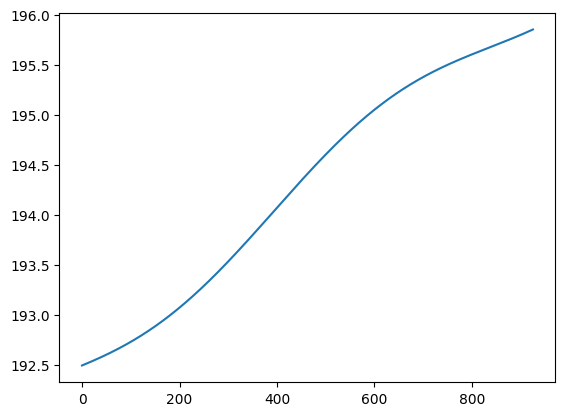

In [2]:
# min_et = 252388112.0
min_et = 254369488.0
max_et = min_et + 360/561 * 86400
rets = []
for et in np.arange(min_et, max_et+59, 60):
    (j2000, lt) = cspyce.spkez(PROMETHEUS_ID, et, 'J2000', 'NONE', SATURN_ID)
    sat = np.dot(J2000_TO_SATURN, j2000[0:3])
    dist = np.sqrt(sat[0]**2.+sat[1]**2.+sat[2]**2.)
    longitude = np.degrees(math.atan2(sat[1], sat[0]))
    rets.append(f_ring.fring_inertial_to_corotating(longitude, et))
#     rets.append(longitude)
plt.plot(rets)

In [3]:
et = cspyce.utc2et('2008-01-23T18:33:35Z')


In [4]:
(j2000, lt) = cspyce.spkez(PROMETHEUS_ID, et, 'J2000', 'NONE', SATURN_ID)
sat = np.dot(J2000_TO_SATURN, j2000[0:3])
dist = np.sqrt(sat[0]**2.+sat[1]**2.+sat[2]**2.)
longitude = np.degrees(math.atan2(sat[1], sat[0]))
print(dist, longitude)

139193.80806541152 143.46837522958444


In [5]:
f_ring.fring_inertial_to_corotating(longitude, et)

193.35494670387047